# **Per Capita Violent Crimes Prediction**
Serial Id: 14

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd


# Reading Discretized Data 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/desc.csv", encoding='latin-1')

In [ ]:
df.shape

(1993, 43)

In [ ]:
df.head(6)

,Unnamed: 0,population,racepctblack,racePctWhite,racePctHisp,agePct12t21,agePct16t24,pctUrban,medFamInc,perCapInc,blackPerCap,OtherPerCap,HispPerCap,PctBSorMore,PctEmplManu,PctEmplProfServ,PctOccupManu,PctKids2Par,PctYoungKids2Par,NumIlleg,PctIlleg,PctImmigRecent,PctRecImmig5,PctRecImmig10,PctSpeakEnglOnly,PersPerOccupHous,PersPerRentOccHous,PctPersOwnOccup,PctHousLess3BR,HousVacant,MedYrHousBuilt,PctHousNoPhone,OwnOccLowQuart,OwnOccMedVal,RentMedian,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumStreet,PctSameHouse85,PctSameCity85,PctUsePubTrans,ViolentCrimesPerPop
0,0,1,1,4,1,2,2,4,2,2,2,2,2,2,1,2,1,3,3,1,1,1,1,1,4,2,2,3,3,1,3,1,1,1,2,2,2,1,1,2,3,1,1
1,1,1,1,3,1,2,2,4,2,2,2,1,2,2,3,1,2,2,3,1,1,3,2,1,4,1,1,2,4,1,3,1,1,1,2,2,2,1,1,2,3,2,3
2,2,1,2,3,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,2,1,1,1,4,2,2,2,3,1,3,2,1,1,2,2,2,2,1,3,3,1,2
3,3,1,4,1,1,3,2,4,3,2,2,2,2,2,2,2,2,3,4,1,2,1,1,1,4,4,4,4,1,1,3,1,1,1,3,3,3,2,1,3,3,2,1
4,4,1,1,4,1,2,1,4,2,2,2,3,2,2,3,2,2,4,4,1,1,1,1,1,4,3,2,4,1,1,3,1,2,2,2,1,3,1,1,3,3,1,1
5,5,1,1,3,1,2,2,4,3,3,4,2,3,4,1,4,1,3,4,1,1,2,2,3,2,2,1,2,3,1,1,1,4,4,3,2,3,1,1,2,3,1,1


# Selected Feature Names from GA

In [ ]:
included_cols = ['population',
 'racepctblack',
 'racePctWhite',
 'racePctHisp',
 'agePct12t21',
 'agePct16t24',
 'pctUrban',
 'medFamInc',
 'perCapInc',
 'blackPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctBSorMore',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctKids2Par',
 'PctYoungKids2Par',
 'NumIlleg',
 'PctIlleg',
 'PctImmigRecent',
 'PctRecImmig5',
 'PctRecImmig10',
 'PctSpeakEnglOnly',
 'PersPerOccupHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctHousLess3BR',
 'HousVacant',
 'MedYrHousBuilt',
 'PctHousNoPhone',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentMedian',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumStreet',
 'PctSameHouse85',
 'PctSameCity85',
 'PctUsePubTrans']

# Train Decision Tree

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


data = df.iloc[:,1:42].values
target = df.ViolentCrimesPerPop.values
print(data)
#print(len(y))
clf = DecisionTreeClassifier(max_depth=4.5, random_state=42)
clf.fit(data, target)

[[1 1 4 ... 2 3 1]
 [1 1 3 ... 2 3 2]
 [1 2 3 ... 3 3 1]
 ...
 [1 1 3 ... 3 4 1]
 [1 1 4 ... 3 3 2]
 [1 1 2 ... 2 2 1]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4.5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# Generate Rules

In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"        #check if feature is valid for tree node
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))     #indent for nested tree and round to two decimals
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
            
        else:                                        #for leaf node
            print("{}return {}".format(indent, tree_.value[node]))
   
   #visit the first node with start depth as 1
    recurse(0, 1)


In [ ]:
tree_to_code(clf, included_cols)

def predict(popul, racepct, racePct, racePc, agePct, agePct, pct, medF, perC, blackP, OtherP, HispP, PctBSo, PctEmp, PctEmplPro, PctOccu, PctKid, PctYoungKid, Num, Pct, PctImmigR, PctRecI, PctRecIm, PctSpeakEng, PersPerOccu, PersPerRentOc, PctPersOwn, PctHousLe, HousV, MedYrHous, PctHousNo, OwnOccLow, OwnOccM, RentM, MedRentPctHo, MedOwnCostP, MedOwnCostPctInc, NumS, PctSameHo, PctSameC, PctUsePub):
    if PctIlleg <= 1.5:
        if PctKids2Par <= 3.5:
            if blackPerCap <= 1.5:
                if racepctblack <= 1.5:
                    return [[315.  44.   5.]]
                else:  # if racepctblack > 1.5
                    return [[12. 12.  0.]]
            else:  # if blackPerCap > 1.5
                if OwnOccLowQuart <= 2.5:
                    return [[260.   6.   6.]]
                else:  # if OwnOccLowQuart > 2.5
                    return [[63.  8.  0.]]
        else:  # if PctKids2Par > 3.5
            if PctSpeakEnglOnly <= 1.5:
                if PctRecImmig5

# Generate Rules in Text Format

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"   #get the valid feature name
        for i in tree_.feature
    ]

    #define two lists
    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]       #indent for nested tree and round to two decimals and add path to list
            recurse(tree_.children_left[node], p1, paths)         # recurse for left leaf
            p2 += [f"({name} > {np.round(threshold, 3)})"]        #add path to list for greater than value
            recurse(tree_.children_right[node], p2, paths)        # recurse for right leaf
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]        # else simple add path for leaf
            paths += [path]                                                  # adding list to list

    recurse(0, path, paths)                 # call recurse with start node and lists
    

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    j = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(j)]
    for p in paths:
        print(p)
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:                    #for all paths in list except last
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:     #for regressor
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]     #for classifier
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"       #defining class selection with probability to 2 decimal place
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
get_rules(clf, included_cols, y)

['(PctIlleg <= 1.5)', '(PctKids2Par > 3.5)', '(PctSpeakEnglOnly > 1.5)', '(PctEmplProfServ <= 3.5)', (array([[546.,   1.,   0.]]), 547)]
['(PctIlleg <= 1.5)', '(PctKids2Par <= 3.5)', '(blackPerCap <= 1.5)', '(racepctblack <= 1.5)', (array([[315.,  44.,   5.]]), 364)]
['(PctIlleg <= 1.5)', '(PctKids2Par <= 3.5)', '(blackPerCap > 1.5)', '(OwnOccLowQuart <= 2.5)', (array([[260.,   6.,   6.]]), 272)]
['(PctIlleg > 1.5)', '(PctIlleg <= 2.5)', '(racePctWhite <= 3.5)', '(MedOwnCostPctIncNoMtg <= 2.5)', (array([[ 88., 118.,  28.]]), 234)]
['(PctIlleg > 1.5)', '(PctIlleg > 2.5)', '(PctKids2Par > 1.5)', '(PctSameCity85 > 1.5)', (array([[30., 64., 32.]]), 126)]
['(PctIlleg > 1.5)', '(PctIlleg <= 2.5)', '(racePctWhite > 3.5)', '(HousVacant <= 2.5)', (array([[93., 26.,  3.]]), 122)]
['(PctIlleg > 1.5)', '(PctIlleg > 2.5)', '(PctKids2Par <= 1.5)', '(PctHousLess3BR <= 3.5)', (array([[13., 46., 45.]]), 104)]
['(PctIlleg <= 1.5)', '(PctKids2Par <= 3.5)', '(blackPerCap > 1.5)', '(OwnOccLowQuart > 2.5)',

['if (PctIlleg <= 1.5) and (PctKids2Par > 3.5) and (PctSpeakEnglOnly > 1.5) and (PctEmplProfServ <= 3.5) then class: 1 (proba: 99.82%) | based on 547 samples',
 'if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) and (blackPerCap <= 1.5) and (racepctblack <= 1.5) then class: 1 (proba: 86.54%) | based on 364 samples',
 'if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) and (blackPerCap > 1.5) and (OwnOccLowQuart <= 2.5) then class: 1 (proba: 95.59%) | based on 272 samples',
 'if (PctIlleg > 1.5) and (PctIlleg <= 2.5) and (racePctWhite <= 3.5) and (MedOwnCostPctIncNoMtg <= 2.5) then class: 3 (proba: 50.43%) | based on 234 samples',
 'if (PctIlleg > 1.5) and (PctIlleg > 2.5) and (PctKids2Par > 1.5) and (PctSameCity85 > 1.5) then class: 3 (proba: 50.79%) | based on 126 samples',
 'if (PctIlleg > 1.5) and (PctIlleg <= 2.5) and (racePctWhite > 3.5) and (HousVacant <= 2.5) then class: 1 (proba: 76.23%) | based on 122 samples',
 'if (PctIlleg > 1.5) and (PctIlleg > 2.5) and (PctKids2Par <= 1.5) and (Pc

In [ ]:
rules = get_rules(clf, included_cols, y)
for r in rules:
    print(r)

if (PctIlleg <= 1.5) and (PctKids2Par > 3.5) and (PctSpeakEnglOnly > 1.5) and (PctEmplProfServ <= 3.5) then class: 1 (proba: 99.82%) | based on 547 samples
if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) and (blackPerCap <= 1.5) and (racepctblack <= 1.5) then class: 1 (proba: 86.54%) | based on 364 samples
if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) and (blackPerCap > 1.5) and (OwnOccLowQuart <= 2.5) then class: 1 (proba: 95.59%) | based on 272 samples
if (PctIlleg > 1.5) and (PctIlleg <= 2.5) and (racePctWhite <= 3.5) and (MedOwnCostPctIncNoMtg <= 2.5) then class: 3 (proba: 50.43%) | based on 234 samples
if (PctIlleg > 1.5) and (PctIlleg > 2.5) and (PctKids2Par > 1.5) and (PctSameCity85 > 1.5) then class: 3 (proba: 50.79%) | based on 126 samples
if (PctIlleg > 1.5) and (PctIlleg <= 2.5) and (racePctWhite > 3.5) and (HousVacant <= 2.5) then class: 1 (proba: 76.23%) | based on 122 samples
if (PctIlleg > 1.5) and (PctIlleg > 2.5) and (PctKids2Par <= 1.5) and (PctHousLess3BR <= 3.5) then 

# Writing Rules into file and save

In [ ]:
import os
print(os.path)
name1 = "desc_rules.txt"
completeName=os.path.join("/content/drive/MyDrive/", str(name1))
file1 = open(completeName, "w")
for r in rules:
  sstring = r.split('|')[0]
  print(sstring)
  file1.write(sstring)
  file1.write("\n")
file1.close()
path = "/content/drive/MyDrive/"
os.chdir(path)

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>
if (PctIlleg <= 1.5) and (PctKids2Par > 3.5) and (PctSpeakEnglOnly > 1.5) and (PctEmplProfServ <= 3.5) then class: 1 (proba: 99.82%) 
if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) and (blackPerCap <= 1.5) and (racepctblack <= 1.5) then class: 1 (proba: 86.54%) 
if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) and (blackPerCap > 1.5) and (OwnOccLowQuart <= 2.5) then class: 1 (proba: 95.59%) 
if (PctIlleg > 1.5) and (PctIlleg <= 2.5) and (racePctWhite <= 3.5) and (MedOwnCostPctIncNoMtg <= 2.5) then class: 3 (proba: 50.43%) 
if (PctIlleg > 1.5) and (PctIlleg > 2.5) and (PctKids2Par > 1.5) and (PctSameCity85 > 1.5) then class: 3 (proba: 50.79%) 
if (PctIlleg > 1.5) and (PctIlleg <= 2.5) and (racePctWhite > 3.5) and (HousVacant <= 2.5) then class: 1 (proba: 76.23%) 
if (PctIlleg > 1.5) and (PctIlleg > 2.5) and (PctKids2Par <= 1.5) and (PctHousLess3BR <= 3.5) then class: 3 (proba: 44.23%) 
if (PctIlleg <= 1.5) and (PctKids2Par <= 3.5) 

# Plotting and Tree Representation

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_19 <= 1.50
|   |--- feature_16 <= 3.50
|   |   |--- feature_9 <= 1.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_9 >  1.50
|   |   |   |--- feature_31 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_31 >  2.50
|   |   |   |   |--- class: 1
|   |--- feature_16 >  3.50
|   |   |--- feature_23 <= 1.50
|   |   |   |--- feature_21 <= 3.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_21 >  3.50
|   |   |   |   |--- class: 1
|   |   |--- feature_23 >  1.50
|   |   |   |--- feature_14 <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_14 >  3.50
|   |   |   |   |--- class: 1
|--- feature_19 >  1.50
|   |--- feature_19 <= 2.50
|   |   |--- feature_2 <= 3.50
|   |   |   |--- feature_36 <= 2.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_36 >  2.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  3.50
|   |   |   |--- featu

[Text(167.4, 195.696, 'X[19] <= 1.5\ngini = 0.394\nsamples = 1993\nvalue = [1506, 343, 144]'),
 Text(83.7, 152.208, 'X[16] <= 3.5\ngini = 0.121\nsamples = 1313\nvalue = [1229, 72, 12]'),
 Text(41.85, 108.72, 'X[9] <= 1.5\ngini = 0.2\nsamples = 731\nvalue = [650, 70, 11]'),
 Text(20.925, 65.232, 'X[1] <= 1.5\ngini = 0.269\nsamples = 388\nvalue = [327, 56, 5]'),
 Text(10.4625, 21.744, 'gini = 0.236\nsamples = 364\nvalue = [315, 44, 5]'),
 Text(31.387500000000003, 21.744, 'gini = 0.5\nsamples = 24\nvalue = [12, 12, 0]'),
 Text(62.775000000000006, 65.232, 'X[31] <= 2.5\ngini = 0.111\nsamples = 343\nvalue = [323, 14, 6]'),
 Text(52.3125, 21.744, 'gini = 0.085\nsamples = 272\nvalue = [260, 6, 6]'),
 Text(73.2375, 21.744, 'gini = 0.2\nsamples = 71\nvalue = [63, 8, 0]'),
 Text(125.55000000000001, 108.72, 'X[23] <= 1.5\ngini = 0.01\nsamples = 582\nvalue = [579, 2, 1]'),
 Text(104.625, 65.232, 'X[21] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(94.16250000000001, 21.744, 'gini =

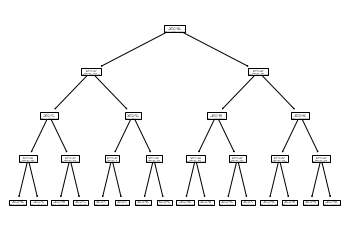

In [ ]:
tree.plot_tree(clf) 

In [ ]:
!pip install graphviz

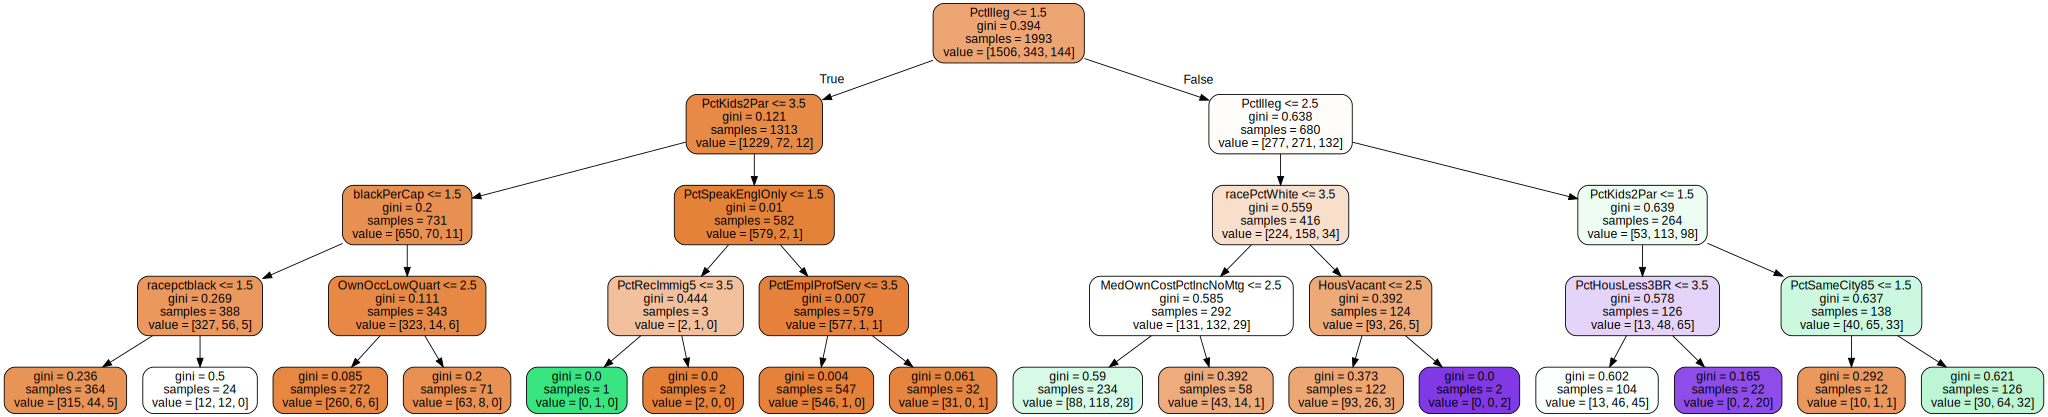

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=included_cols,    
                             filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
graph.render("crime")

'crime.pdf'